In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import gradio as gr

In [2]:
car = pd.read_csv("C:/Users/Lenovo/Desktop/Project_IndoSkill/DataSet/CAR DETAILS FROM CAR DEKHO.csv")
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
car = car[car.selling_price < 6e6]

In [7]:
car.describe()

,year,selling_price,km_driven
count,4338.000000,4.338000e+03,4338.000000
mean,2013.089212,5.004294e+05,66241.810512
std,4.215666,5.523828e+05,46639.036337
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.062492e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,5.500000e+06,806599.000000


In [8]:
car.shape

(4338, 8)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11772\3348701880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(), annot = True, fmt="0.1f")


<Axes: >

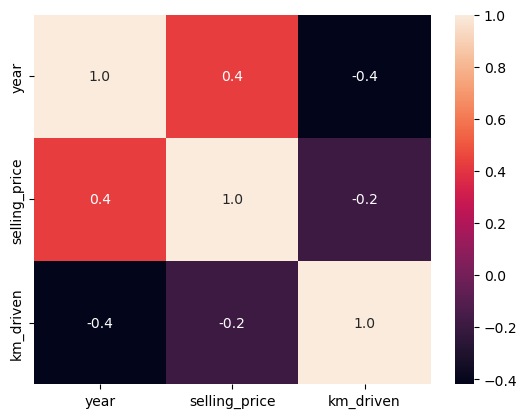

In [9]:
sns.heatmap(car.corr(), annot = True, fmt="0.1f")

In [10]:
car.drop("owner", axis = 1, inplace = True)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual


In [11]:
car["company"] = car.name.str.split().str.slice(0,1)

In [58]:
def convert(x):
  return x[0]

car["company"] = car["company"].apply(convert)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,M
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,M
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,H
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,D
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,H


In [13]:
car['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [14]:
car['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [15]:
car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
car['fuel'].value_counts()

Diesel      2152
Petrol      2122
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [17]:
car['seller_type'].value_counts()

Individual          3244
Dealer               992
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [18]:
car['transmission'].value_counts()

Manual       3892
Automatic     446
Name: transmission, dtype: int64

In [19]:
x = car.drop(columns = "selling_price")
y = car[["selling_price"]]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3036, 7), (1302, 7), (3036, 1), (1302, 1))

In [22]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Honda


In [23]:
ohe = OneHotEncoder()
ohe.fit(x[['name', 'fuel', 'seller_type', 'transmission', 'company']])

OneHotEncoder()

In [24]:
ohe.categories_

[array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
        'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
        'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
        'Volvo XC60 D5 Inscription'], dtype=object),
 array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
        'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
        'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]

In [25]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name', 'fuel', 'seller_type', 'transmission', 'company']),
                                      remainder="passthrough")

In [26]:
lr = LinearRegression()

In [27]:
pipe = make_pipeline(column_trans, lr)

In [28]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
       'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
       'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
       'Volvo XC60 D5 Inscription'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'E...
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'company'])])),
                ('linearregression', LinearRegression())])

In [29]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500 DSL AC', 'Ambassador Classic 2000 Dsz',
       'Ambassador Grand 1800 ISZ MPFI PW CL', ...,
       'Volvo XC 90 D5 Inscription BSIV', 'Volvo XC60 D3 Kinetic',
       'Volvo XC60 D5 Inscription'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'E...
                                                                            array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'company'])])),
                ('linearregression', LinearRegression())])

In [30]:
ypred = pipe.predict(x_test)
ypred

array([[900459.63679747],
       [518973.51277706],
       [505183.03812151],
       ...,
       [691367.90850995],
       [345007.96657643],
       [713213.40954569]])

In [31]:
r2_score(y_test,ypred)

0.6849249646830686

In [55]:
input_data = car
new_data = pd.DataFrame(input_data, columns=["name","year","km_driven","fuel","seller_type","transmission","company"])


In [56]:
pipe.predict(new_data)

array([[105588.28021391],
       [131127.77497303],
       [429949.16210218],
       ...,
       [123777.82709058],
       [650595.35252991],
       [184167.1468503 ]])

In [52]:
import numpy as np

def car_pred(name,year,km_driven,fuel,seller_type,transmission,company):
    x=np.array([name,year,km_driven,fuel,seller_type,transmission,company])
    x=np.array(x).reshape(1,-1)
    input_data = x
    new_data = pd.DataFrame(input_data, columns=["name","year","km_driven","fuel","seller_type","transmission","company"])
    result = pipe.predict(new_data)
    result=float(result)
    return result

In [53]:
app = gr.Interface(fn=car_pred,
                     inputs=[gr.inputs.Dropdown(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], label='Name'),
                     gr.inputs.Number(label='year'),
                     gr.inputs.Number(label='km_driven'),
                     gr.inputs.Dropdown(["Petrol", "Diesel", "CNG", "LPG", "Electric"], label='fuel'),
                     gr.inputs.Dropdown(['Individual', 'Dealer', 'Trustmark Dealer'], label='seller_type') ,        
                     gr.inputs.Dropdown(['Manual', 'Automatic'], label='transmission'),
                     gr.inputs.Dropdown(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
                     'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep', 'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat','Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
                      'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'],label='company')],
                outputs="label",
                title="Developing an ML model for car_price prediction")    

C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\inputs.py:222: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)


In [54]:
app.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
